In [1]:
import pandas_profiling as pp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
data = pd.read_csv('heart.csv')
data.sample(8)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0


In [4]:
data.info() #sepertinya tidak ada data yang kosong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
#categorical columns
cat_heart = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall','output']
#continuous columns
conti_heart = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [6]:
data.describe().style.background_gradient(axis=1,cmap=sns.light_palette('limegreen', as_cmap=True))

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1. rata-rata umur pasien : 54 pasien, Jenis nyeri dada nya  angina khas,  tekanan darah istirahat 131 (dalam mm Hg), kolestoral dalam mg / dl diambil melalui sensor BMI adalah 246, gula darah puasa tidak > 120 mg / dl, dst
2. rata-rata : berjenis kelamin pria, hasil elektrokardiografik istirahat memiliki kelainan,  detak jantung maksimum tercapai 149, dst 

In [7]:
data.isnull().sum() #tidak ada data kosong

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
#cek apakah ada data duplikat?
print(data.duplicated().sum()) #ternyata ada duplicated data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum()) #data sudah tidak ada data duplikated

1
0


In [21]:
for col in cat_heart: #berikut adalah sebaran nilainya
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom sex:
1    206
0     96
Name: sex, dtype: int64

Value count kolom cp:
0    143
2     86
1     50
3     23
Name: cp, dtype: int64

Value count kolom fbs:
0    257
1     45
Name: fbs, dtype: int64

Value count kolom restecg:
1    151
0    147
2      4
Name: restecg, dtype: int64

Value count kolom exng:
0    203
1     99
Name: exng, dtype: int64

Value count kolom slp:
2    141
1    140
0     21
Name: slp, dtype: int64

Value count kolom caa:
0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64

Value count kolom thall:
2    165
3    117
1     18
0      2
Name: thall, dtype: int64

Value count kolom output:
1    164
0    138
Name: output, dtype: int64



UNIVARIATE ANALYSIS : untuk analysis satu variable sehingga mengetahui karakteristik dari variable

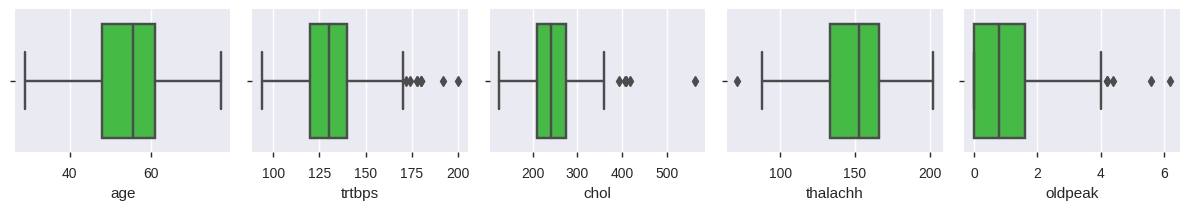

In [34]:
plt.figure(figsize=(12, 12))
for i in range(0, len(conti_heart)):
  plt.subplot(6, 5, i+1)
  sns.boxplot(data[conti_heart[i]], color='limegreen', orient='v')
  plt.tight_layout()
#terlihat variable setelah age terdapat outlier dan bentuk distribusi nya mayoritas skew positif

In [35]:
print("Skew: {}".format(data[conti_heart].skew())) 
#setelah dilihat nilai skew kecil lebih baik tidak perlu dilakukan normalisasi

Skew: age        -0.203743
trtbps      0.716541
chol        1.147332
thalachh   -0.532671
oldpeak     1.266173
dtype: float64


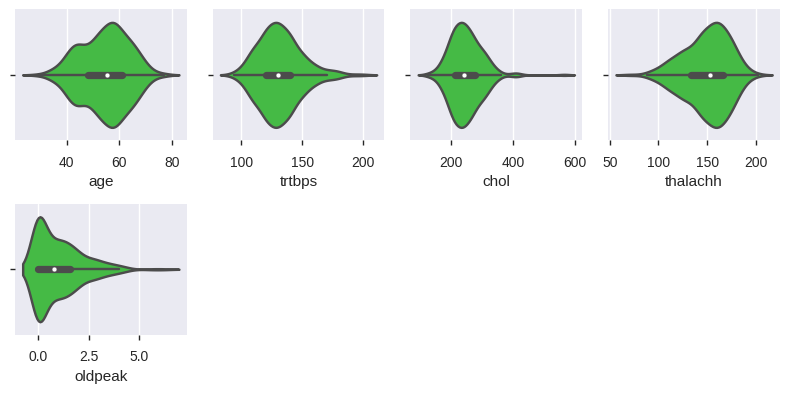

In [36]:
for i in range(0, len(conti_heart)):
    plt.subplot(3,4, i+1)
    sns.violinplot(data[conti_heart[i]], color='limegreen', orient='v')
    plt.tight_layout()#bentuk distribusi mendekati normal tetapi sepertinya perlu dilakukan handle outlier karena terdapat data outlier

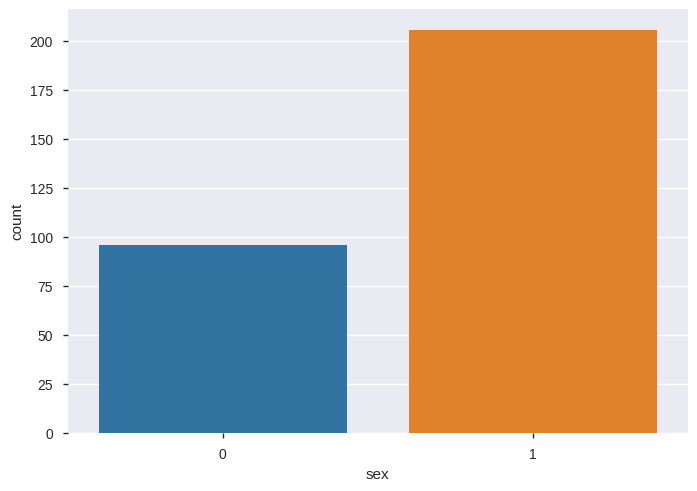

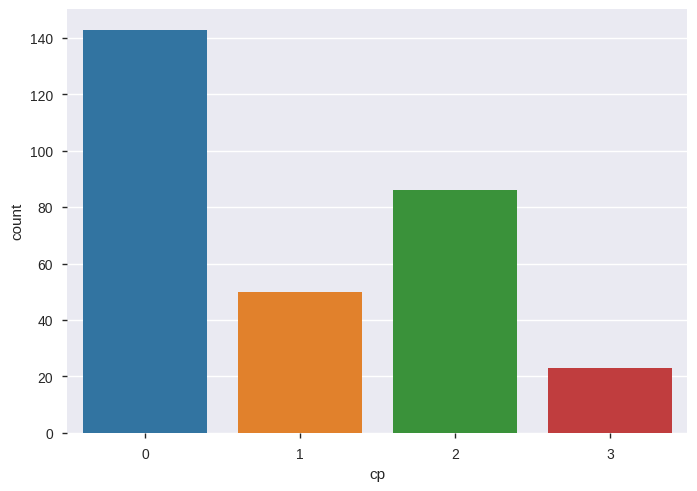

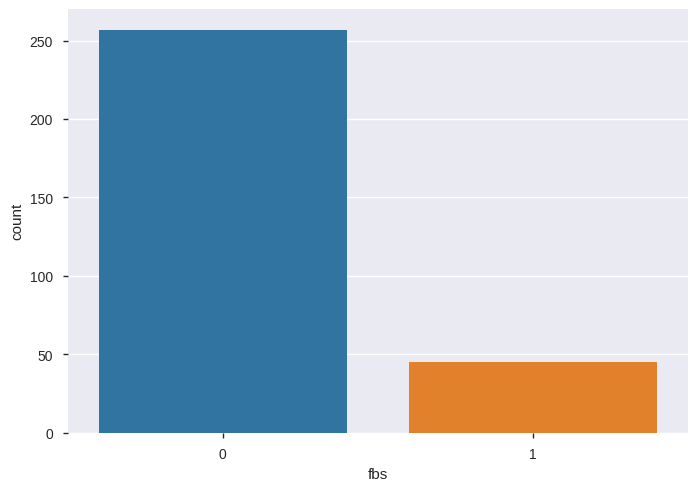

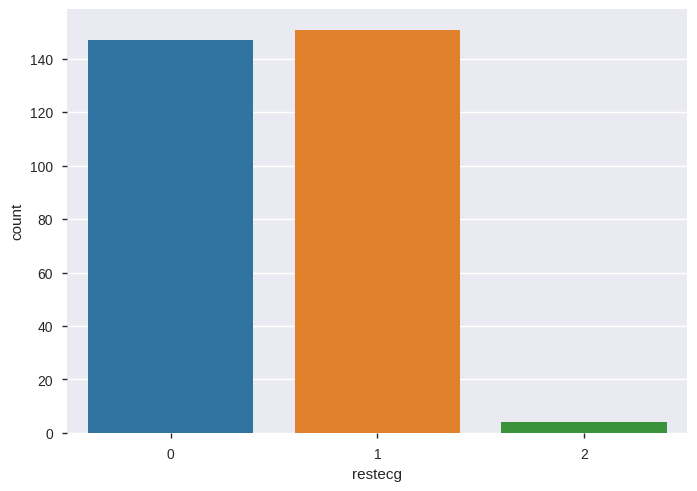

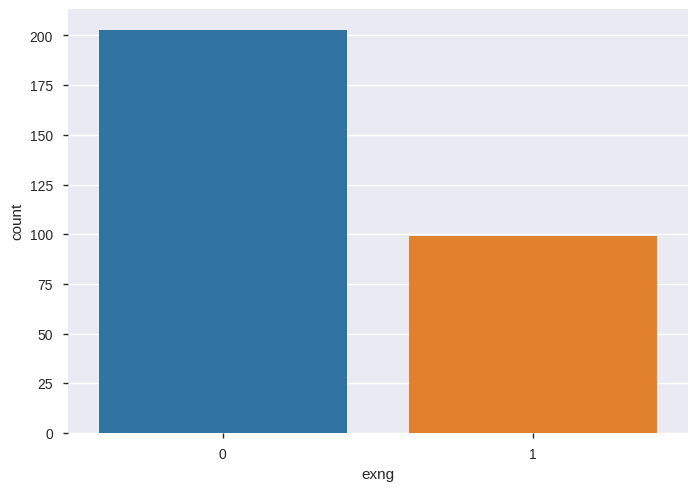

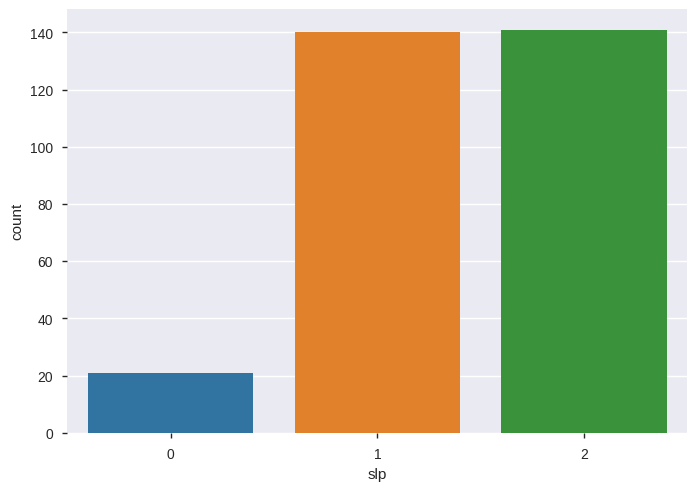

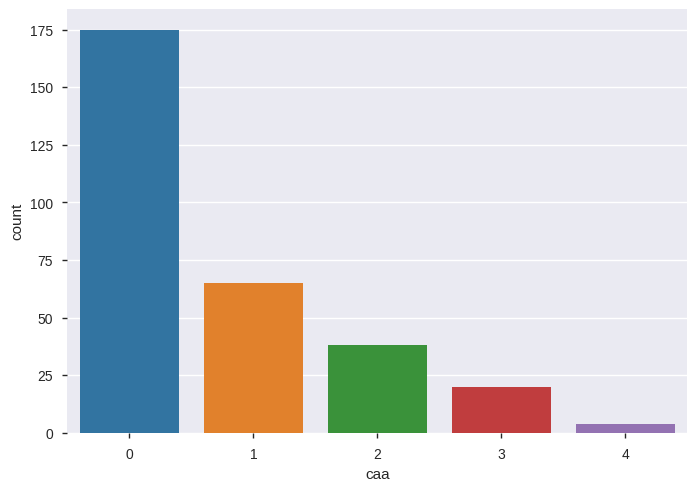

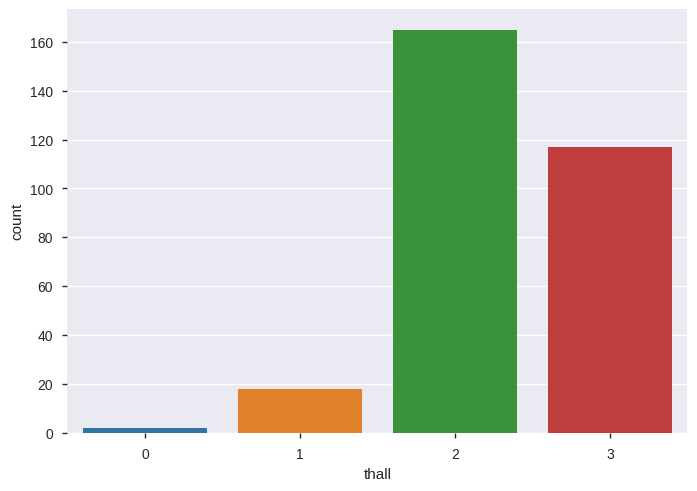

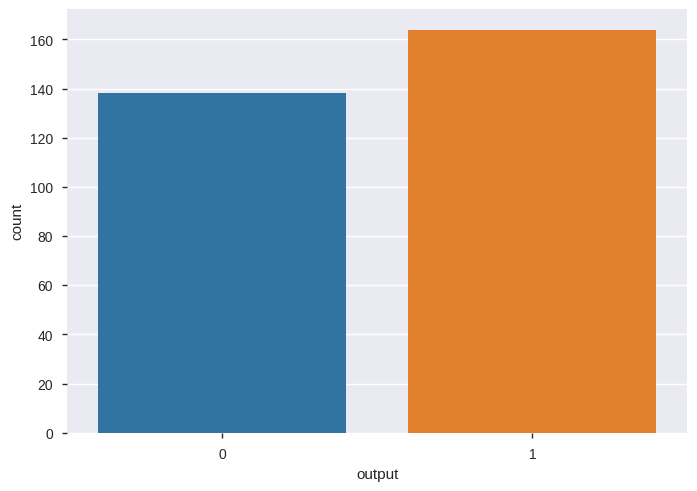

In [44]:
for i in data[cat_heart].columns: #visualisasi univariate
    sns.countplot(data[i])
    plt.show()

1. didominasi pria
2. mayoritas penyakit typical angina 
3. gula darah puasa tidak > 120 mg / dl
4. minoritas menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes
5. melakukan latihan angina yang diinduksi 
6. dan lebih banyak pasien memilki peluang terkena serangan jantung lebih tinggi


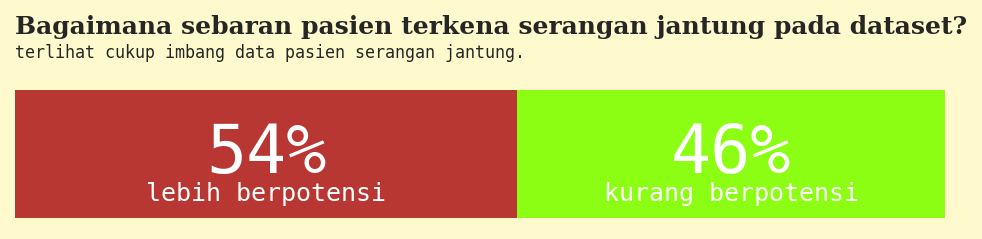

In [76]:
import plotly as py
import plotly.graph_objs as go
background_color = "lemonchiffon"
face_color = 'lemonchiffon'
yes_c='firebrick'
no_c='chartreuse'
neut_c ='k'
sub_col = 'violet'

#EDA VISUALIZATION
x=data.groupby(['output'])['output'].count()
y=len(data)
r=((x/y)).round(2)

ratio = pd.DataFrame(r).T

fig = plt.figure(figsize=(8, 10), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(5, 1)
gs.update(wspace=0.02, hspace=0.8)
ax = fig.add_subplot(gs[0, 0])



ax.set_facecolor(background_color)

ax.barh(ratio.index, ratio[1.0], color=yes_c, alpha=0.9, label='lebih berpotensi')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color=no_c, alpha=0.9, label='kurang berpotensi')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", 
                   xy=(ratio[1.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='monospace',
                   color='white')

    ax.annotate("lebih berpotensi", 
                   xy=(ratio[1.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='monospace',
                   color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='monospace',
                   color='white')
    ax.annotate("kurang berpotensi", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='monospace',
                   color='white')



# Title & Subtitle
ax.text(0,0.75,'Bagaimana sebaran pasien terkena serangan jantung pada dataset?',fontsize=12, fontweight='bold',fontfamily='serif')
ax.text(0,0.6,'terlihat cukup imbang data pasien serangan jantung.',fontsize=8,fontfamily='monospace')  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

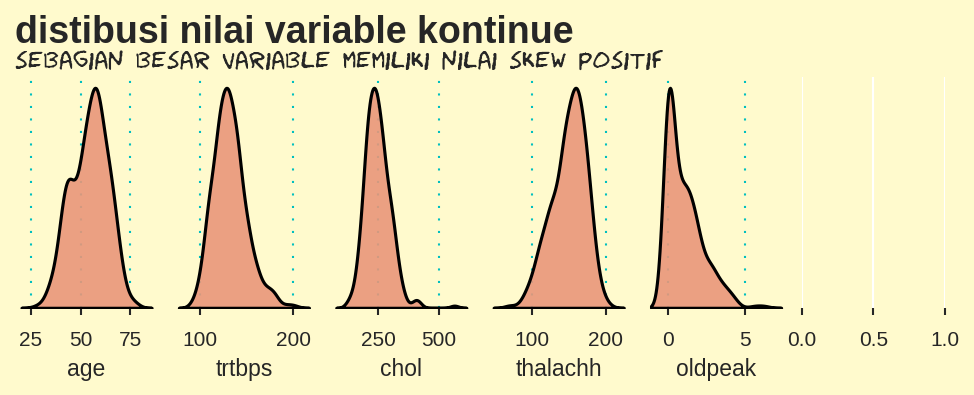

In [78]:
fig = plt.figure(figsize=(8, 2), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 6)
gs.update(wspace=0.1, hspace=0.4)

# for plotting
df = data

run_no = 0
for row in range(0, 1):
    for col in range(0, 6):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for variable in conti_heart:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(run_no)], color='darksalmon',ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='c', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        run_no += 1
        

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.text(Xstart, Yend+(Yend*0.15), 'distibusi nilai variable kontinue', fontsize=18, fontweight='bold', fontfamily='sans-serif')
ax0.text(Xstart, Yend+(Yend*0.05), 'sebagian besar variable memiliki nilai skew positif', fontsize=12, fontweight='light', fontfamily='fantasy')

plt.show()

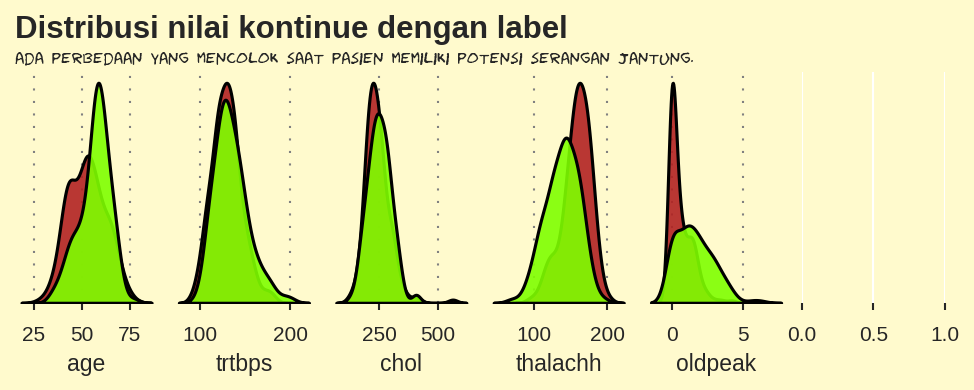

In [79]:
fig = plt.figure(figsize=(8,2), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 6)
gs.update(wspace=0.1, hspace=0.4)

# for plotting
df = data

run_no = 0
for row in range(0, 1):
    for col in range(0, 6):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        locals()["ax"+str(run_no)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0

Yes = df[df['output'] == 1]
No = df[df['output'] == 0]

for variable in conti_heart:
        sns.kdeplot(Yes[variable], ax=locals()["ax"+str(run_no)], color=yes_c,ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(No[variable],ax=locals()["ax"+str(run_no)], color=no_c, shade=True, ec='black',linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        run_no += 1
        
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.text(Xstart, Yend+(Yend*0.15), 'Distribusi nilai kontinue dengan label', fontsize=15, fontweight='bold', fontfamily='sans-serif')
ax0.text(Xstart, Yend+(Yend*0.05), 'ada perbedaan yang mencolok saat pasien memiliki potensi serangan jantung.', fontsize=8, fontweight='light', fontfamily='fantasy')

plt.show()

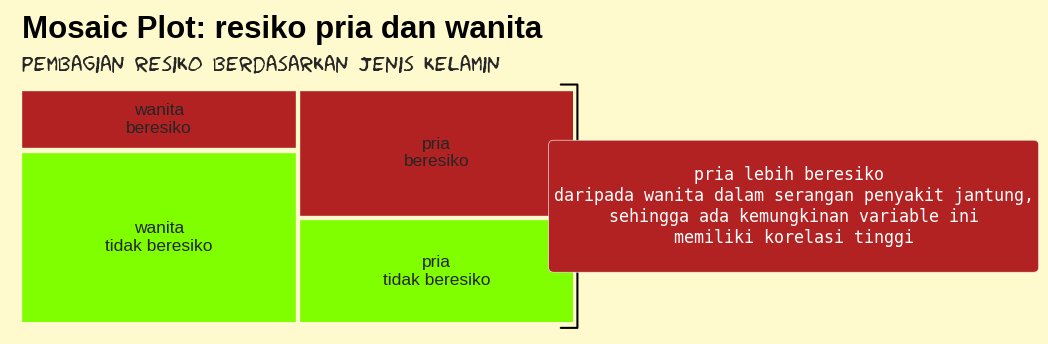

In [89]:
from statsmodels.graphics.mosaicplot import mosaic

fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])

ax0.set_facecolor(face_color)

props = lambda key: {'color': yes_c if 'beresiko' in key else  no_c}

gap = [0.01,0.025]

data_mos = {('wanita', 'tidak beresiko'): 0.75, ('wanita', 'beresiko'): 0.25, ('pria', 'tidak beresiko'): 0.45, ('pria', 'beresiko'): 0.55}
mosaic(data_mos, gap=gap,properties=props,axes_label=False,ax=ax0)


ax0.text(0,1.23,'Mosaic Plot: resiko pria dan wanita',fontsize=15, fontweight='bold',fontfamily='sans-serif',color='black')
ax0.text(0,1.1,'pembagian resiko berdasarkan jenis kelamin',fontsize=10, fontfamily='fantasy')

ax0.annotate('''
pria lebih beresiko 
daripada wanita dalam serangan penyakit jantung,
sehingga ada kemungkinan variable ini
memiliki korelasi tinggi
''', xy=(1, 0.5), xytext=(1.4, 0.5), xycoords='data', 
            fontsize=8, ha='center', va='center',fontfamily='monospace',
            bbox=dict(boxstyle='round', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=7.3, lengthB=1', lw=1, color='black'), color='white')
plt.show()

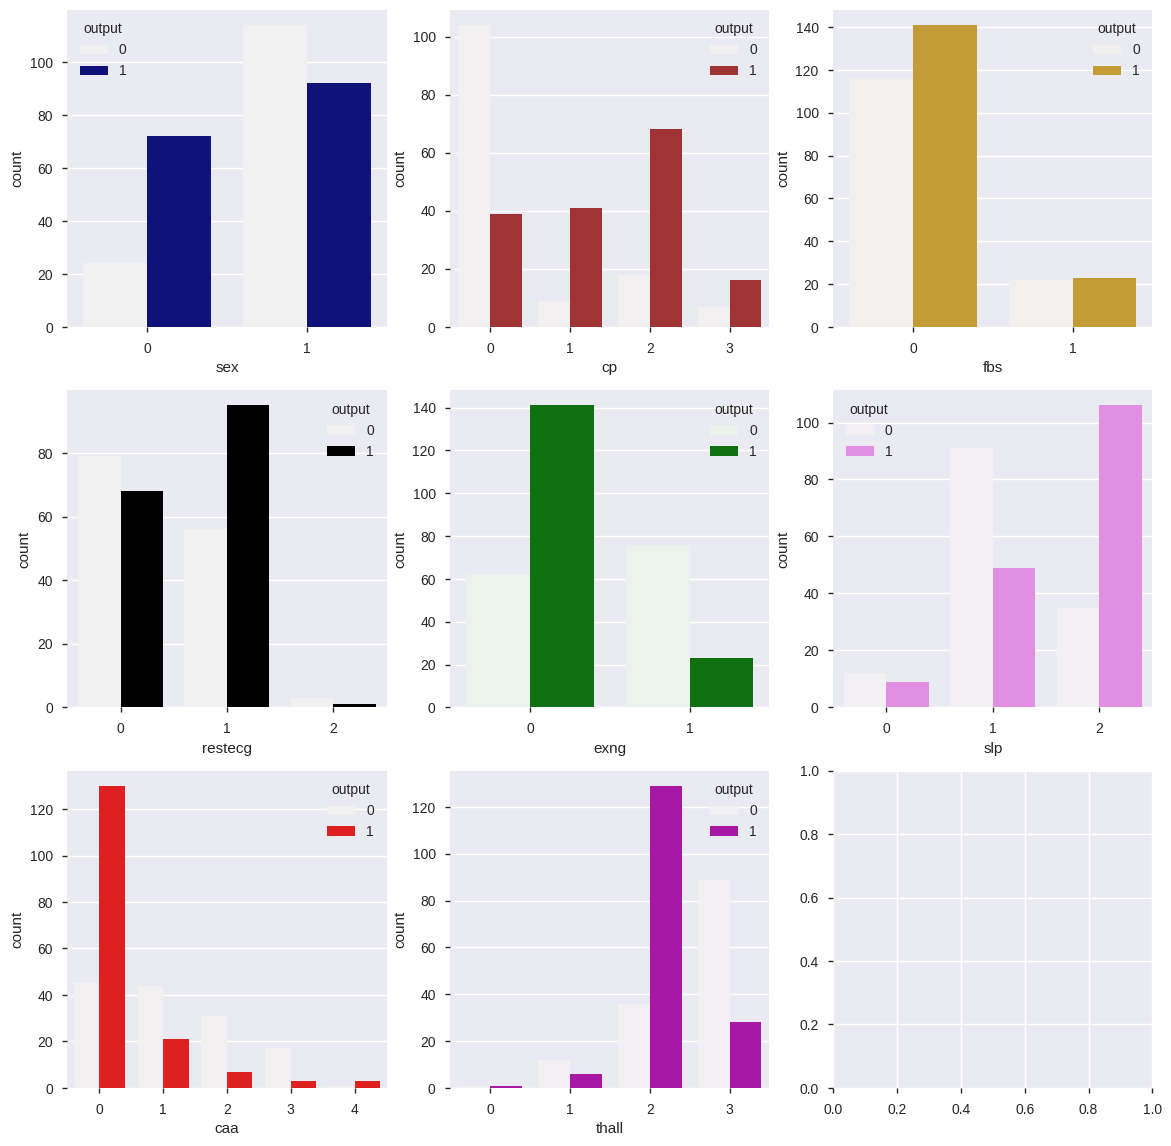

In [101]:
fig, ax =plt.subplots(nrows=3,ncols=3,figsize=(14,14))
sns.countplot('sex',hue='output',data=data,color='darkblue',ax=ax[0,0])
sns.countplot('cp',hue='output',data=data,color='firebrick',ax=ax[0,1])
sns.countplot('fbs',hue='output',data=data,color='goldenrod',ax=ax[0,2])
sns.countplot('restecg',hue='output',data=data,color='black',ax=ax[1,0])
sns.countplot('exng',hue='output',data=data,color='green',ax=ax[1,1])
sns.countplot('slp',hue='output',data=data,color='violet',ax=ax[1,2])
sns.countplot('caa',hue='output',data=data,color='red',ax=ax[2,0])
sns.countplot('thall',hue='output',data=data,color='m',ax=ax[2,1])
plt.show()

Bivariate analysis : nilai hubungan 2 variable

---



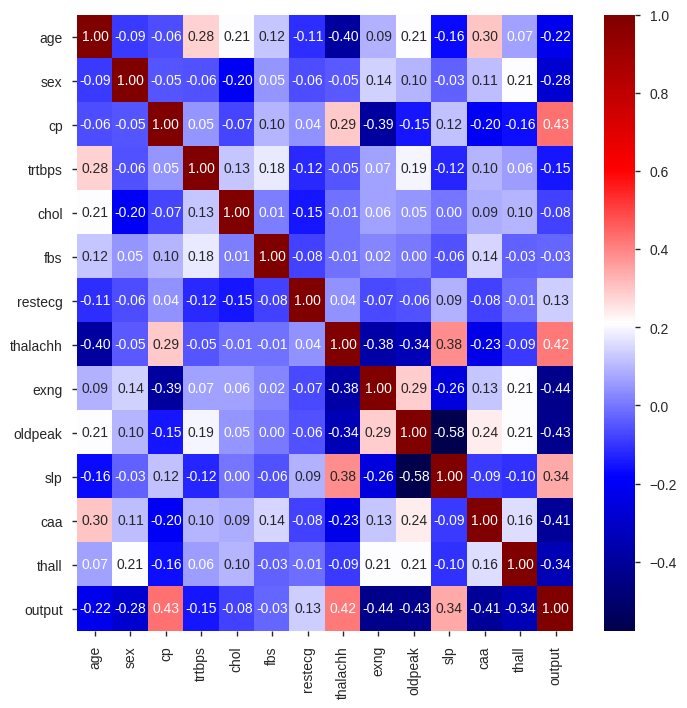

In [90]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='seismic', annot=True, fmt='.2f')
#terlihat pclass dengan fare kemungkinan multikolinearitas dan 
#masih banyak nilai korelasi yang kecil terhadap label sehingga perlu modifikasi variable lagi

<Figure size 1500x1500 with 0 Axes>

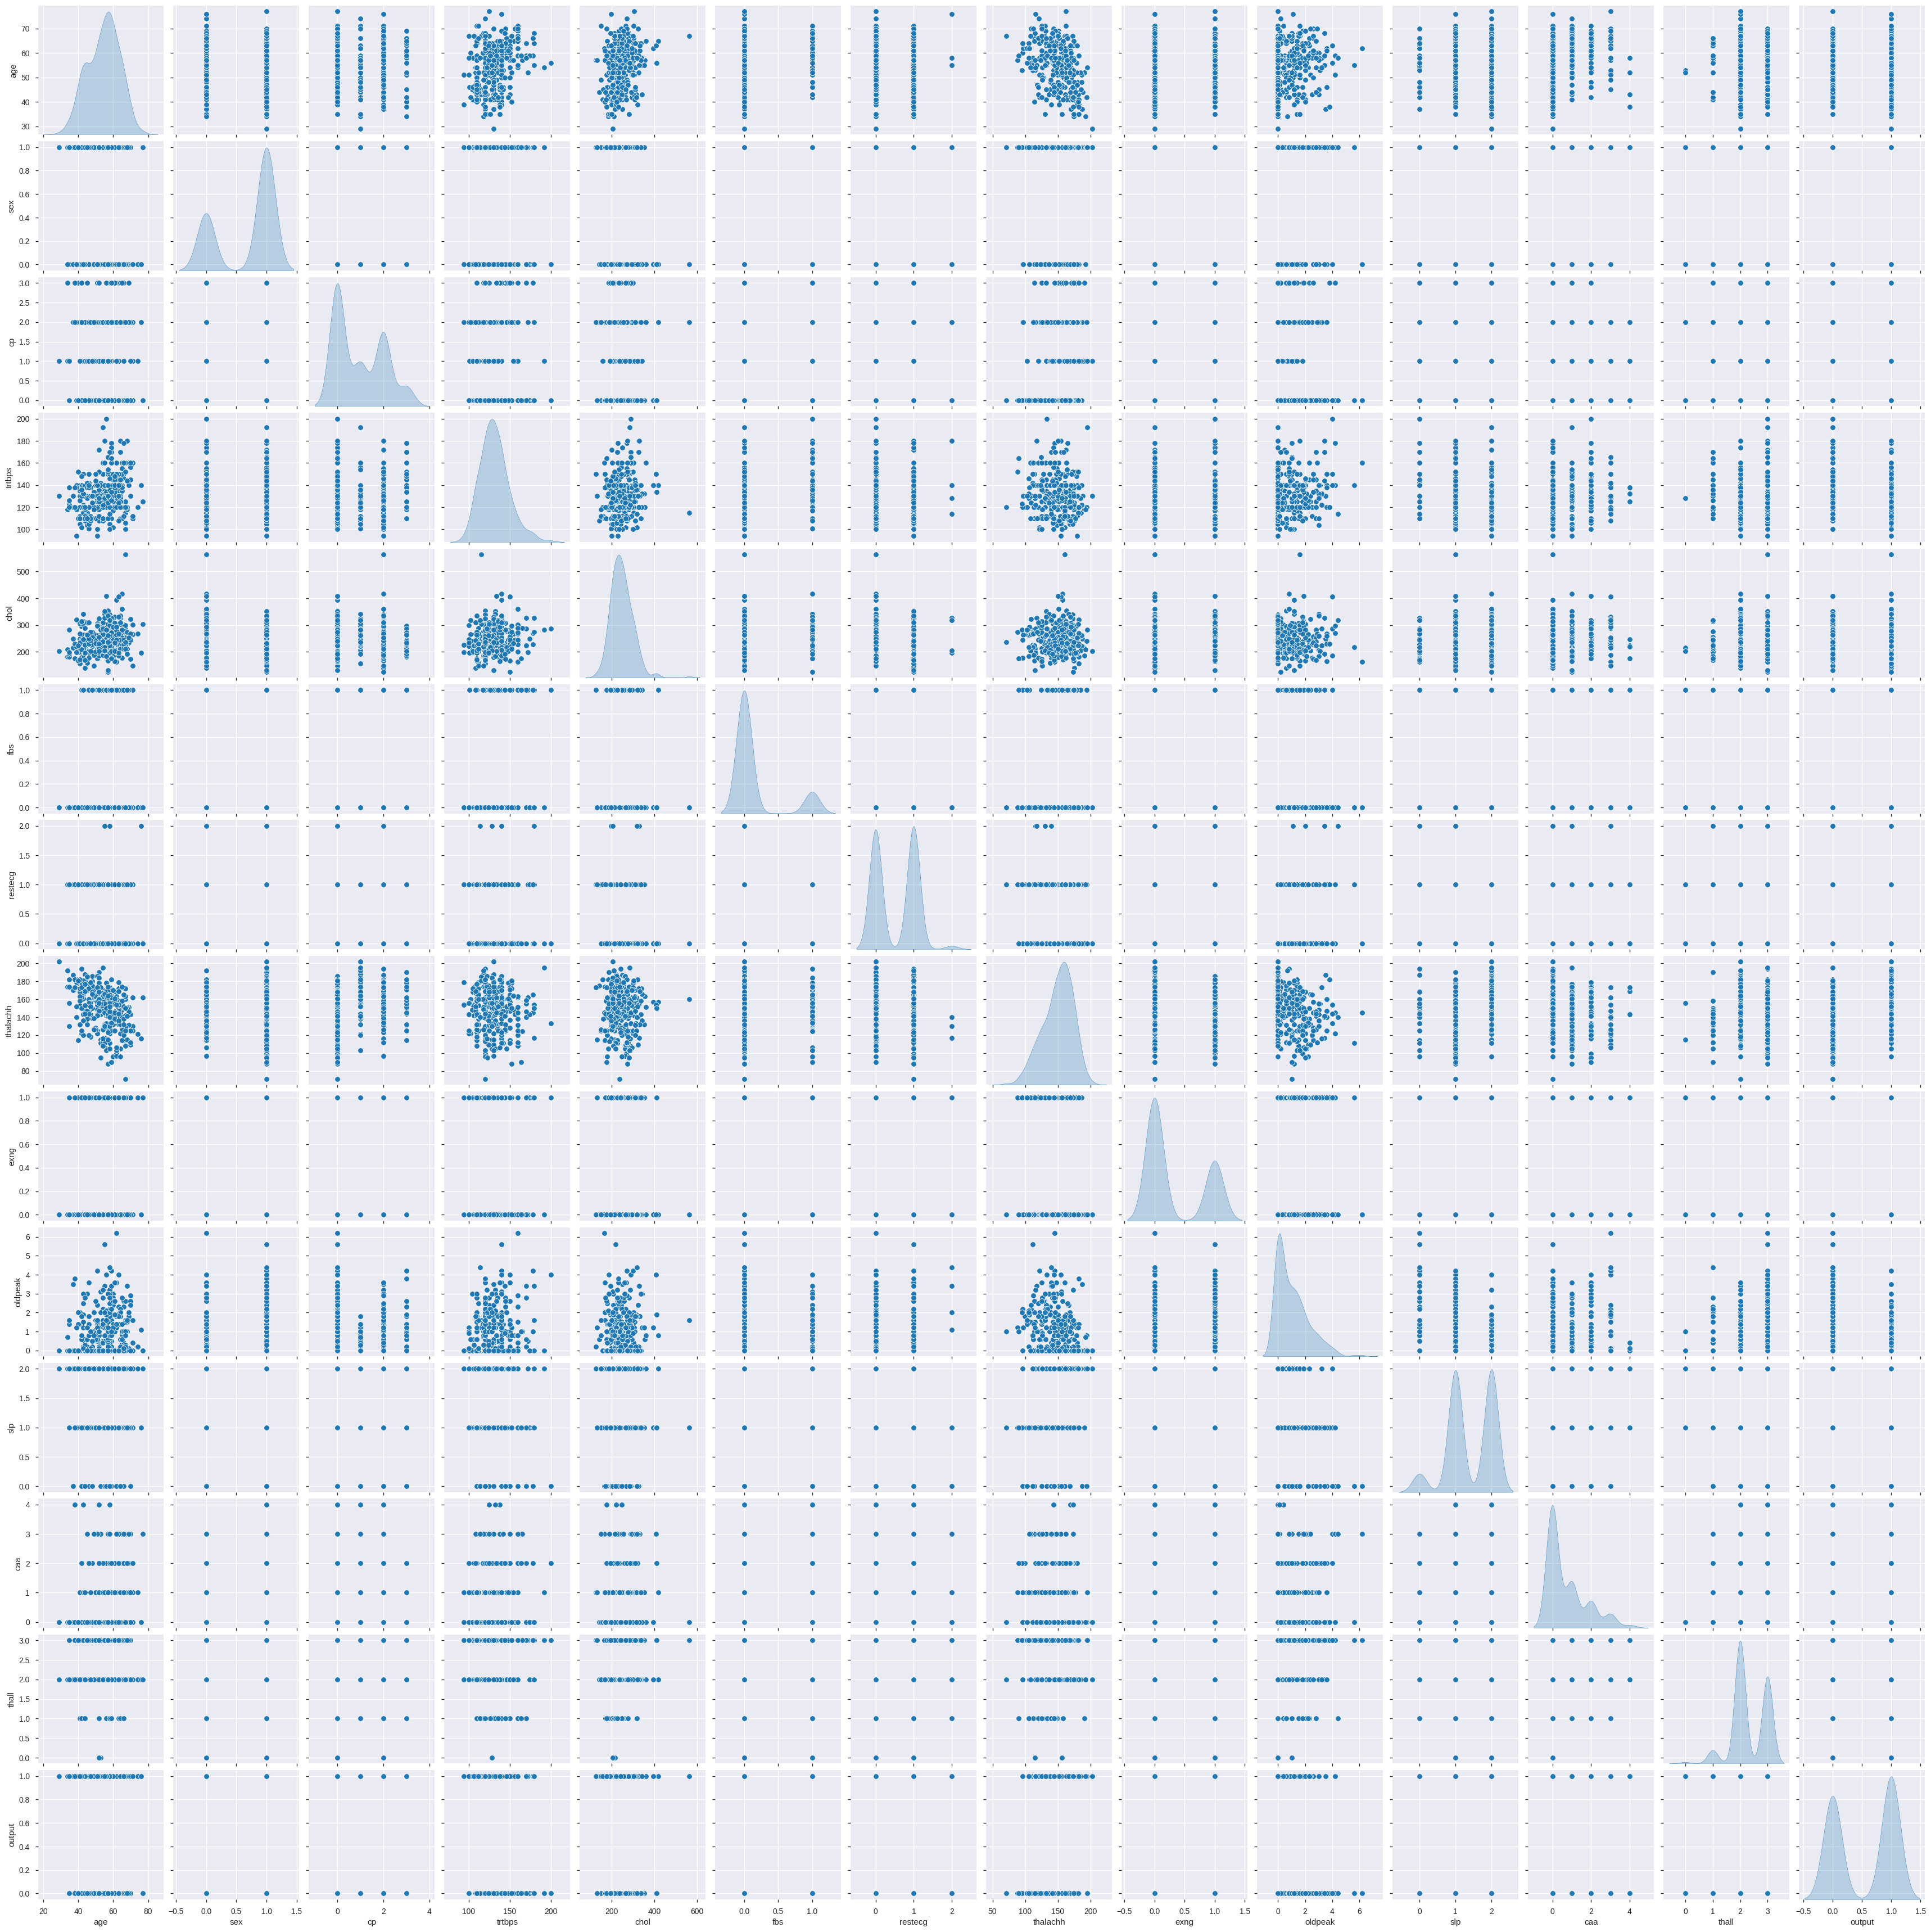

In [94]:
plt.figure(figsize=(15, 15)) #sebaran nilai : sama seperti representasi korelasi hanya ini bentuk visualisasinya
sns.pairplot(data, diag_kind='kde') 

In [95]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

## CODE HERE
filtered_entries = np.array([False] * len(data))
for col in ['trtbps', 'chol', 'thalachh', 'oldpeak']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] < low_limit) | (data[col] > high_limit)) | filtered_entries
    
data1 = data[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data1)}')

Jumlah baris sebelum memfilter outlier: 302
Jumlah baris setelah memfilter outlier: 283


In [103]:
data1.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [104]:
X = data1.drop('output', axis = 1)
y = data1['output']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

In [107]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test)) 

0.8771929824561403


In [110]:
#MODEL RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200 , oob_score = True, n_jobs = -1,
                                  random_state =75, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8947368421052632


In [111]:
from sklearn.svm import SVC #MODEL SVM
model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8771929824561403

In [112]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8596491228070176

In [113]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8771929824561403

In [114]:
#DEEP LEARNING
from keras.models import Sequential
from keras.layers import Dense
# define the keras sequential model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=13)

Epoch 1/150
22/22 [==============================] - 1s 1ms/step - loss: 12.3802 - accuracy: 0.3994
Epoch 2/150
22/22 [==============================] - 0s 1ms/step - loss: 1.8603 - accuracy: 0.4461
Epoch 3/150
22/22 [==============================] - 0s 2ms/step - loss: 1.1281 - accuracy: 0.6017
Epoch 4/150
22/22 [==============================] - 0s 2ms/step - loss: 0.9438 - accuracy: 0.5909
Epoch 5/150
22/22 [==============================] - 0s 1ms/step - loss: 1.0121 - accuracy: 0.5778
Epoch 6/150
22/22 [==============================] - 0s 1ms/step - loss: 0.8276 - accuracy: 0.6162
Epoch 7/150
22/22 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.6161
Epoch 8/150
22/22 [==============================] - 0s 2ms/step - loss: 0.7483 - accuracy: 0.6723
Epoch 9/150
22/22 [==============================] - 0s 2ms/step - loss: 0.7701 - accuracy: 0.6504
Epoch 10/150
22/22 [==============================] - 0s 2ms/step - loss: 0.7458 - accuracy: 0.6498
Epoch 11

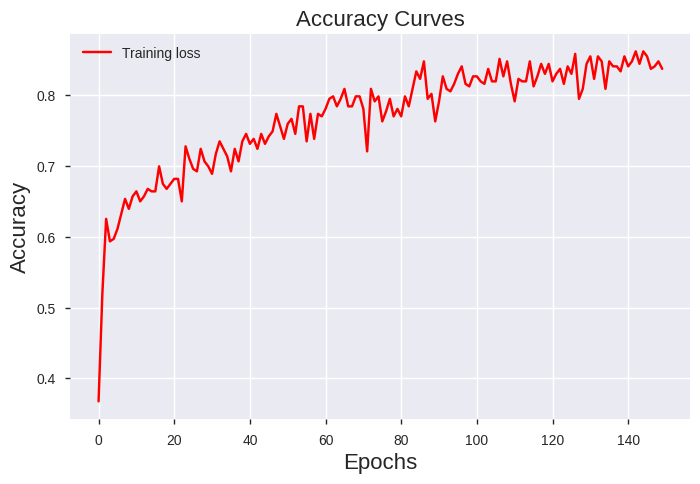

In [117]:
#TITIK OPTIMUM
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [118]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}') #SKOR AKURASI TERTINGGI DIDEEP LEARNING

Accuracy: 84.21
